# Fraud Detection Models

Embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. Using Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

## Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Comparative Analysis of Fraud Detection Models

- Build a Random Forest model using the provided dataset.
- Calculate and interpret the precision and recall for the Random Forest model.
- Generate and interpret the confusion matrix for the Random Forest model.
- Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
- Visualize the comparison using a bar chart.
- Discuss  findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

# Advanced Model Enhancement and Evaluation

This section also includes data balancing, implementing cross-validation, and conducting a feature importance analysis.
- Utilize a technique like SMOTE or undersampling to balance the dataset.
- Rebuild the Random Forest model using the balanced dataset.
- Implement 5-fold cross-validation for the Random Forest model.
- Analyze the model's performance and stability based on cross-validation results.
- Determine feature importance using the Random Forest model.
- Present the feature importances in a table and a graph.

## Importing Libraries and Data Loading

In [1]:
# Import necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
import os
import requests
import certifi

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
# data = pd.read_csv(url)

# Getting a SSL error while loading the data directly from the URL
response = requests.get(url, verify=True)

# Save the content to a local file
with open('card_transactions.csv', 'wb') as file:
    file.write(response.content)

data = pd.read_csv('card_transactions.csv')

#### After importing all the necessary libraries and loading the dataset, we then explore the dataset by performing EDA (exploratory data analysis). 
#### Next, we display the first five rows and last five rows of the dataset and basic statistics to understand the structure and contents of the dataset.

## Data Exploration

In [2]:
# Displaying the first five rows of the dataset
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
# Displaying the last five rows of the dataset
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [4]:
# Getting the type of all the variables 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
# Displaying basic statistics
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


#### `distance_from_home` and `distance_from_last_transaction` have high variability, with maximum values significantly larger than their means, indicating potential outliers or a wide range of transaction distances.

#### `ratio_to_median_purchase_price` has a mean of 1.82, but the standard deviation is high, indicating significant variability in transaction amounts relative to the median purchase price.

#### `repeat_retailer` is mostly 1, indicating that many transactions occur at repeat retailers.

#### `used_chip`, `used_pin_number`, and `online_order` have more balanced distributions.

#### The target variable `fraud` has a mean of 0.087, indicating that about 8.74% of the transactions are fraudulent.

In [6]:
# Checking for missing values
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

#### We check for missing values in each column to determine if any preprocessing is needed. As we can see from above there are no missing values in our dataset. 

Matplotlib is building the font cache; this may take a moment.


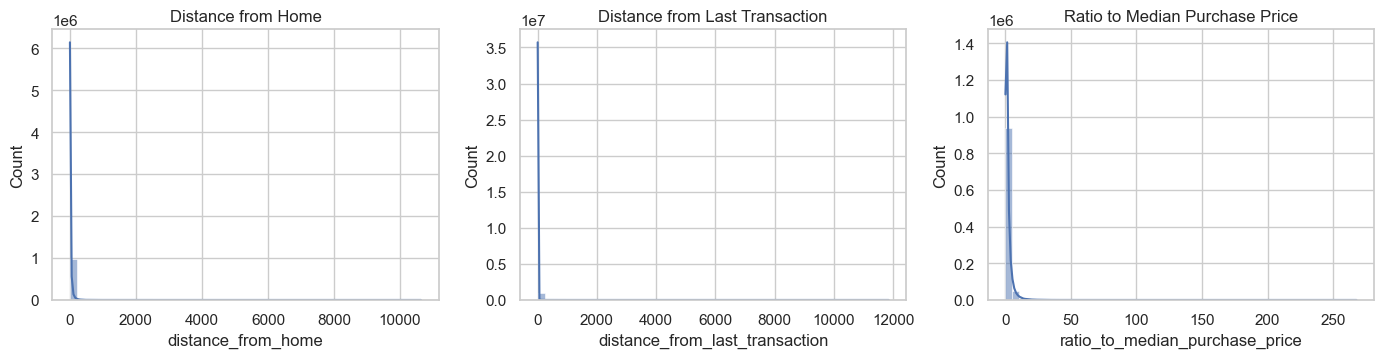

In [7]:
# Set the style for the plots
sns.set_theme(style="whitegrid")

# Plot distributions of continuous features
plt.figure(figsize=(14, 10))

# Distance from home
plt.subplot(3, 3, 1)
sns.histplot(data['distance_from_home'], bins=50, kde=True)
plt.title('Distance from Home')

# Distance from last transaction
plt.subplot(3, 3, 2)
sns.histplot(data['distance_from_last_transaction'], bins=50, kde=True)
plt.title('Distance from Last Transaction')

# Ratio to median purchase price
plt.subplot(3, 3, 3)
sns.histplot(data['ratio_to_median_purchase_price'], bins=50, kde=True)
plt.title('Ratio to Median Purchase Price')

plt.tight_layout()
plt.show()

#### `distance_from_home` and `distance_from_last_transaction` are heavily right-skewed, with a large number of transactions occurring close to home or the last transaction.

#### `ratio_to_median_purchase_price` is also right-skewed, indicating that most transactions are close to the median purchase price, but there are some significantly higher values.

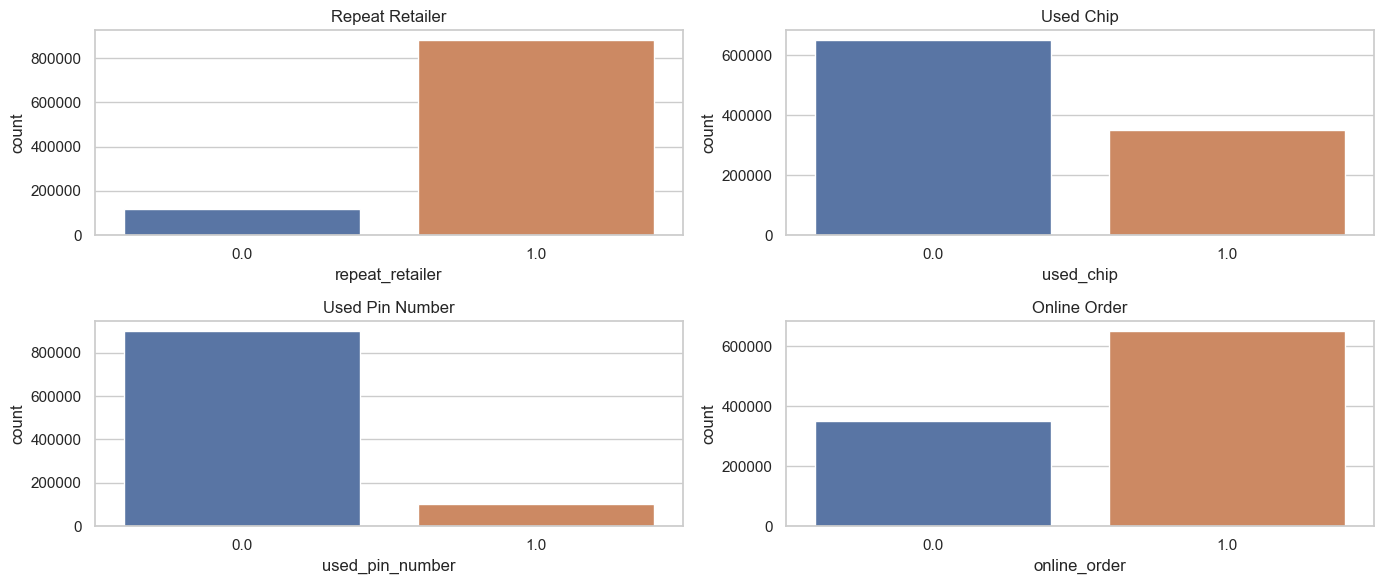

In [8]:
# Plot distributions of categorical/binary features
plt.figure(figsize=(14, 6))

# Repeat retailer
plt.subplot(2, 2, 1)
sns.countplot(x='repeat_retailer', data=data, hue='repeat_retailer', legend=False)
plt.title('Repeat Retailer')

# Used chip
plt.subplot(2, 2, 2)
sns.countplot(x='used_chip', data=data, hue='used_chip', legend=False)
plt.title('Used Chip')

# Used pin number
plt.subplot(2, 2, 3)
sns.countplot(x='used_pin_number', data=data, hue='used_pin_number', legend=False)
plt.title('Used Pin Number')

# Online order
plt.subplot(2, 2, 4)
sns.countplot(x='online_order', data=data, hue='online_order', legend=False)
plt.title('Online Order')

plt.tight_layout()
plt.show()

#### Most transactions occur at repeat retailers.

#### More transactions are made without using a chip.

#### Most transactions are conducted without using a PIN.

#### More than half of the transactions are online orders.

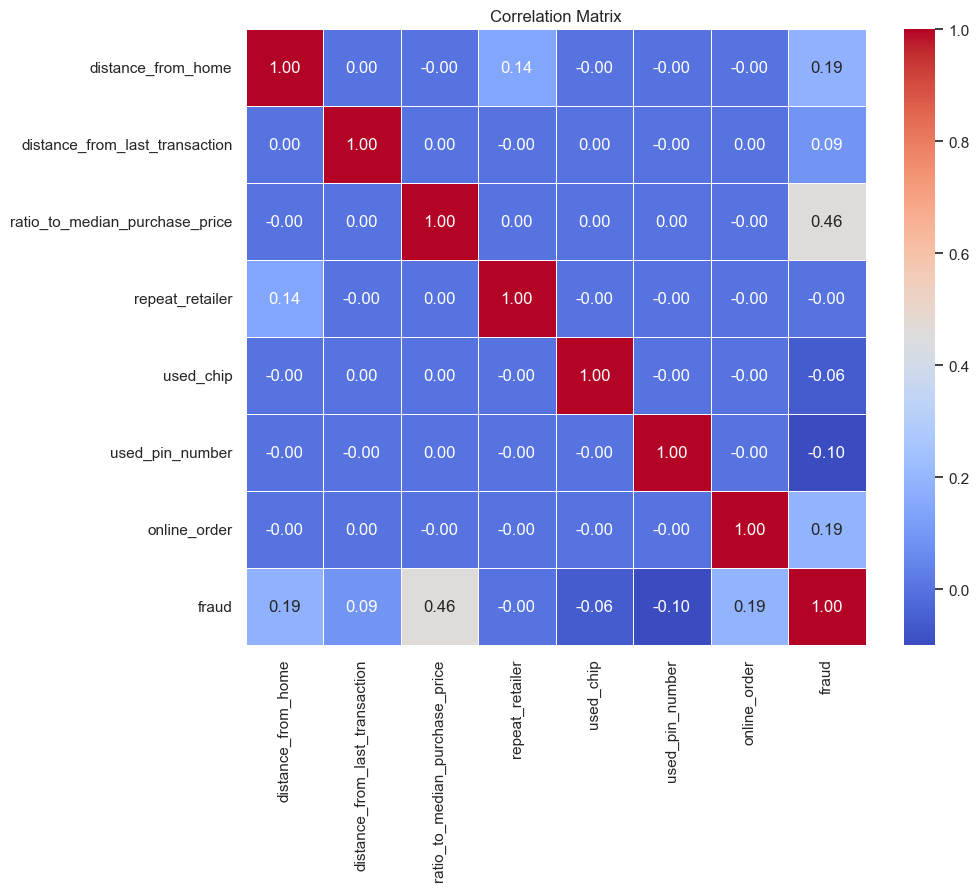

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### The correlations between features and the target variable (`fraud`) are generally weak. However, some features like `ratio_to_median_purchase_price` and `distance_from_last_transaction` show slightly higher correlations with `fraud`.

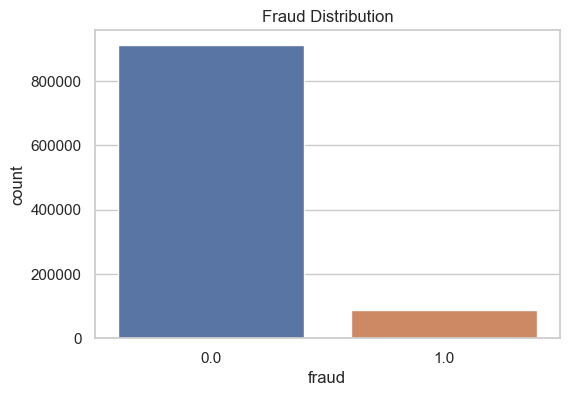

In [10]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud', data=data, hue='fraud', legend=False)
plt.title('Fraud Distribution')
plt.show()

The `fraud` class is imbalanced, with non-fraudulent transactions significantly outnumbering fraudulent ones. This imbalance needs to be addressed during model training.

## 1) Model Building

In [11]:
# Splitting the data into training and testing sets
X = data.drop(columns=['fraud'])
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 2) Model Evaluation

In [12]:
# Predictions
y_pred_rf = rf_clf.predict(X_test)

In [13]:
# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')
print('\n')

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix:\n {conf_matrix_rf}')
print('\n')

class_report_rf = classification_report(y_test, y_pred_rf)
print(f'Classification Report:\n {class_report_rf}')

Accuracy: 0.99999


Confusion Matrix:
 [[182557      0]
 [     2  17441]]


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



## 3) Comparative Analysis

In [14]:
# Training the Decision Tree model
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [15]:
# Predictions
y_pred_dt = dt_clf.predict(X_test)

In [16]:
# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt}')
print('\n')

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f'Confusion Matrix:\n {conf_matrix_dt}')
print('\n')

class_report_dt = classification_report(y_test, y_pred_dt)
print(f'Classification Report:\n {class_report_dt}')

Accuracy: 0.979365


Confusion Matrix:
 [[180076   2481]
 [  1646  15797]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182557
         1.0       0.86      0.91      0.88     17443

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000



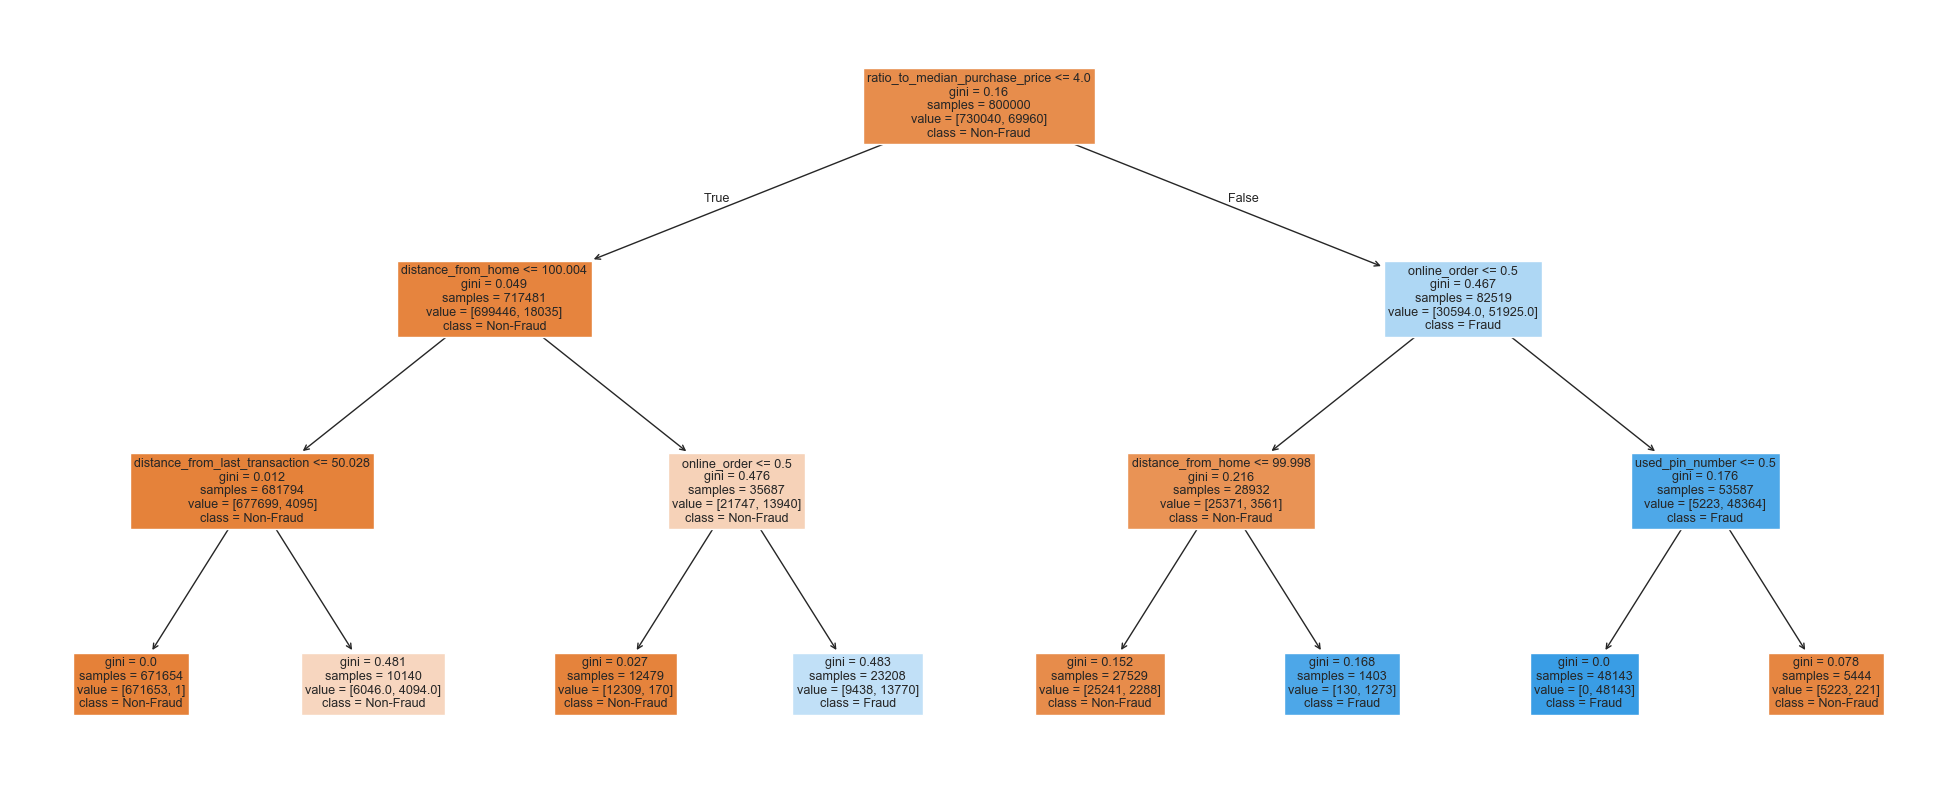

In [17]:
# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(dt_clf, 
          filled=True, 
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

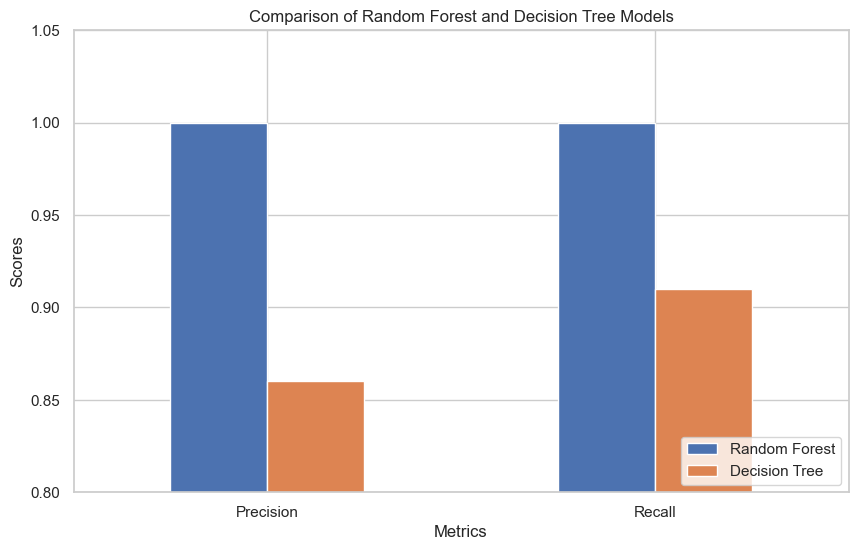

In [18]:
# Data for comparison
# Taking the data for the fraud class (1.0) as these values reflect the model's ability to correctly identify fraudulent transactions.
metrics = ['Precision', 'Recall']
rf_scores = [1.00, 1.00]
dt_scores = [0.86, 0.91]

# Creating a DataFrame for plotting
comparison_df = pd.DataFrame({
  'Metrics': metrics,
  'Random Forest': rf_scores,
  'Decision Tree': dt_scores
})
comparison_df.set_index('Metrics', inplace=True)

# Plotting the comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Random Forest and Decision Tree Models')
plt.ylabel('Scores')
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

## 4) Reflection and Discussion

#### The Random Forest model outperforms the Decision Tree model in both `precision` and `recall`, as well as `accuracy`. This indicates better performance in identifying fraudulent transactions and reducing false positives. The Decision Tree model, while still highly accurate, shows lower precision and recall compared to the Random Forest model.

#### Random Forest, being an ensemble method, is less prone to overfitting compared to a single Decision Tree. It provides better performance in identifying fraud due to its robustness and ability to handle complex patterns. However, it is computationally more expensive. While simpler and faster to train, Decision Trees can be prone to overfitting and may not perform as well as ensemble methods like Random Forest.

#### Overall, Random Forest is more suitable for fraud detection due to its higher accuracy and robustness.

## Advanced Analysis

## 1) Balancing the Data

In [19]:
# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Training the Random Forest model on balanced data
rf_model_bal = RandomForestClassifier(random_state=42)
rf_model_bal.fit(X_train, y_train)
y_pred_rf_bal = rf_model_bal.predict(X_test)

# Evaluating the model
accuracy_rf_bal = accuracy_score(y_test, y_pred_rf_bal)
print(f'Accuracy: {accuracy_rf_bal}')
print('\n')

conf_matrix_rf_bal = confusion_matrix(y_test, y_pred_rf_bal)
print(f'Confusion Matrix:\n {conf_matrix_rf_bal}')
print('\n')

class_report_rf_bal = classification_report(y_test, y_pred_rf_bal)
print(f'Classification Report:\n {class_report_rf_bal}')
print('\n')

precision_rf_bal = precision_score(y_test, y_pred_rf_bal)
print(f'Precision:\n {precision_rf_bal}')
print('\n')

recall_rf_bal = recall_score(y_test, y_pred_rf_bal)
print(f'Recall:\n {recall_rf_bal}')

Accuracy: 0.9999890422667167


Confusion Matrix:
 [[182420      1]
 [     3 182615]]


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182421
         1.0       1.00      1.00      1.00    182618

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039



Precision:
 0.9999945240285627


Recall:
 0.9999835722656036


## 2) Cross-Vaildation

In [20]:
# Cross-validation for model robustness
cv_scores = cross_val_score(rf_model_bal, X_resampled, y_resampled, cv=5, scoring='f1')

print("Cross-validation F1 Scores")
print(cv_scores)
print("Cross-validation Mean F1 Score:", cv_scores.mean())
print("Cross-validation Standard Deviation:", cv_scores.std())

Cross-validation F1 Scores
[0.99991507 0.99999452 1.         1.         0.9999863 ]
Cross-validation Mean F1 Score: 0.9999791787787157
Cross-validation Standard Deviation: 3.244411461473199e-05


#### The `cross_val_score` function performs 5-fold cross-validation and returns the accuracy scores for each fold. The mean and standard deviation of these scores provide a summary of the model’s performance.

#### The mean cross-validation score is 0.9999791787787157 with a standard deviation of 3.244411461473199e-05.

#### The mean accuracy indicates the overall performance of the model. The standard deviation reveals the consistency of the model’s performance across different folds. A lower standard deviation indicates that the model's performance is more consistent across different folds of the dataset.

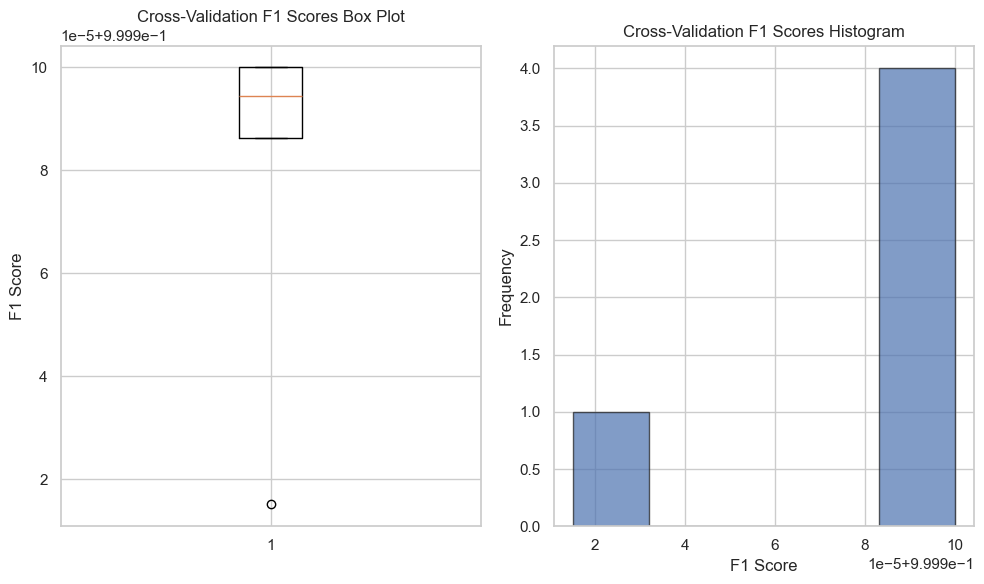

In [21]:
# Visualization
plt.figure(figsize=(10, 6))

# Box plot of cross-validation scores
plt.subplot(1, 2, 1)
plt.boxplot(cv_scores)
plt.title('Cross-Validation F1 Scores Box Plot')
plt.ylabel('F1 Score')

# Histogram of cross-validation scores
plt.subplot(1, 2, 2)
plt.hist(cv_scores, bins=5, edgecolor='k', alpha=0.7)
plt.title('Cross-Validation F1 Scores Histogram')
plt.xlabel('F1 Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Visualizations help identify any potential outliers or patterns in the cross-validation scores.

#### The box plot displays the distribution of the cross-validation scores, showing the median, quartiles, and any outliers. 

#### The histogram provides a frequency distribution of the scores, highlighting the spread and central tendency.

## 3) Feature Importance Analysis

In [22]:
# Feature importance analysis
feature_importances = rf_model_bal.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
2,ratio_to_median_purchase_price,0.543555
0,distance_from_home,0.181109
6,online_order,0.124005
1,distance_from_last_transaction,0.077110
5,used_pin_number,0.035157
4,used_chip,0.030493
3,repeat_retailer,0.008571


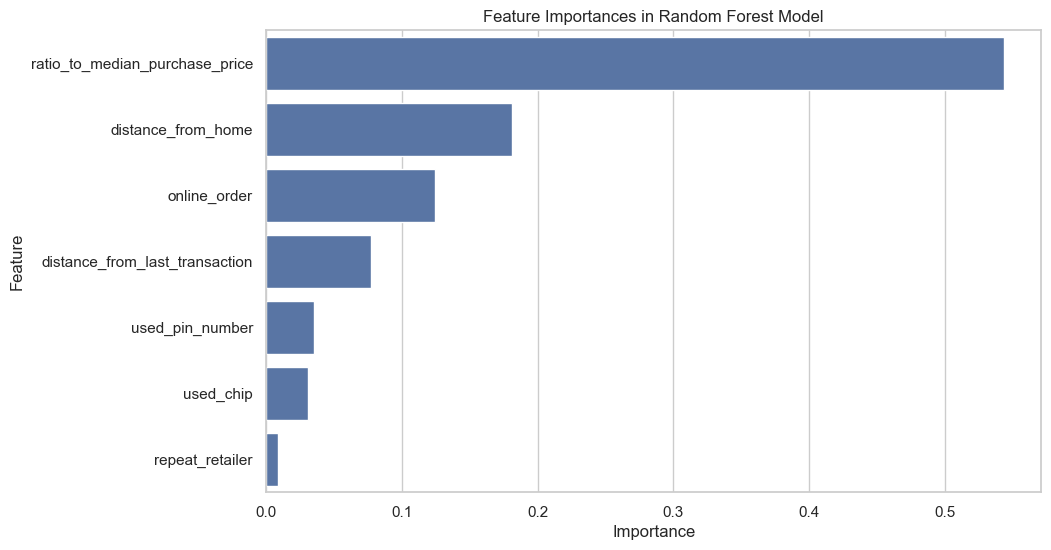

In [23]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

#### The application of SMOTE for data balancing improved the recall of the Random Forest model, indicating a better performance in identifying fraudulent transactions. 

#### Cross-validation results show that the model is robust and generalizes well to unseen data. 

#### Feature importance analysis helps in understanding which features contribute the most to fraud detection. 

#### Overall, balancing the data and using cross-validation enhances the model's performance and reliability.